In [268]:
import numpy as np
import pandas as pd
import os 
import sys
import time
import matplotlib.pyplot as plt

# 벤다이어그램용
%matplotlib inline
import venn

In [287]:
class commonIndexExtraction:
    
    def __init__(self, region):
        self.path = os.getcwd()[:-5] + f'\\region\\{region}' #'\\region\\{}'.format(region) 
        self.region = region

    def makeDir(self):
        self.newPath = os.path.join(f'{self.path}\\0_commonPatientID') 
         
        if not os.path.exists(self.newPath):
            os.makedirs(os.path.join(f'{self.path}\\0_commonPatientID'))
        else:
            print('이미 존재합니다.')
        
        # 0_ 은 파일리스트 뽑을 때 commonPatientID 디렉토리를 맨 앞에 두기 위해서 해놓음.
    
    def dataSet(self):
        #filelist 부분을 합침
        self.fileList = os.listdir(self.path)[1:] 
        file_list = []
        for filename in self.fileList:
            # 파일명이 문자열을 포함하는지 확인
            if self.region in filename:
                file_list.append(filename)
        self.fileList = file_list
        self.dataDict = {}
        for i in self.fileList:
            self.dataDict[i] = pd.read_csv(self.path+'\\{}'.format(i), encoding = 'utf-16', index_col = 0)
        print('All files are added')
    
    # Tmedication에는 환자정보와 시간이 없어서 만들기위해 TMedicalRecord와 MedicalRecordID를 key로서 사용하여 연결
    def Tmedication(self):
        
        #2024 버전의 데이터에 맞춰 변경
        temp = self.dataDict[f'{self.region}_tmedicalrecord.csv'][['MedicalRecordID','PatientID','ConsultTime']]

        
        #저장하는 형식으로 코드 수정
        self.dataDict['{}_tmedication.csv'.format(self.region)] = \
            pd.merge(temp,self.dataDict['{}_tmedication.csv'.format(self.region)], how = 'inner', on = 'MedicalRecordID')

        
        
    def patientChartNo(self):
        self.dataDict[f'{self.region}_tpatientpersonal.csv'] = \
        self.dataDict[f'{self.region}_tpatientpersonal.csv'].loc[self.dataDict[f'{self.region}_tpatientpersonal.csv']['PatientChartNo'].notnull()]

    def countUniquePatientID(self):
        for i in self.dataDict.keys():
            sheetPatientIDSet = self.dataDict[i]['PatientID']
            print(f'{i} sheetPatientIDSet,{len(sheetPatientIDSet)}')
            sheetPatientIDSet = set(self.dataDict[i]['PatientID'])
            print(f'{i} sheetPatientIDSet,{len(sheetPatientIDSet)}')

    def vennDiagram(self):
        self.inbodySet        = set(self.dataDict['{}_tinbodyadditionaldata.csv'.format(self.region)]['PatientID'])
        self.privateSet       = set(self.dataDict[f'{self.region}_tpatientpersonal.csv']['PatientID'])
        self.medicationSet    = set(self.dataDict['{}_tmedication.csv'.format(self.region)]['PatientID'])
        self.medicalRecordSet = set(self.dataDict['{}_tmedicalrecord.csv'.format(self.region)]['PatientID'])
        self.vitalTempSet     = set(self.dataDict['{}_tpatientvitaltemp.csv'.format(self.region)]['PatientID'])
    
        self.labels = venn.get_labels([self.inbodySet,self.privateSet,self.medicationSet,self.medicalRecordSet,self.vitalTempSet])
        # augument 로 fill을 안써도 되는구나 ( pilot 보면 여기에 써놓음)
        plt.figure(figsize=(12,8))
        fig,ax = venn.venn5(self.labels,names = ['inbody','private','medication','medicalRecord','vitalTemp'])
        plt.title(f'{self.region}')
        plt.show()
        plt.close()

In [288]:
gangnam = commonIndexExtraction(region= 'gangnam')

In [289]:
gangnam.dataSet()

C:\Users\howsr\AppData\Local\Temp\ipykernel_34200\3633285310.py:28: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  self.dataDict[i] = pd.read_csv(self.path+'\\{}'.format(i), encoding = 'utf-16', index_col = 0)
C:\Users\howsr\AppData\Local\Temp\ipykernel_34200\3633285310.py:28: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  self.dataDict[i] = pd.read_csv(self.path+'\\{}'.format(i), encoding = 'utf-16', index_col = 0)


All files are added


C:\Users\howsr\AppData\Local\Temp\ipykernel_34200\3633285310.py:28: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self.dataDict[i] = pd.read_csv(self.path+'\\{}'.format(i), encoding = 'utf-16', index_col = 0)


In [290]:
medrec_df = gangnam.dataDict['gangnam_tmedicalrecord.csv']

In [291]:
medrec_df['ConsultTime']

0        20221107090000
1        20221107090500
2        20221107092000
3        20221107092500
4        20221107093000
              ...      
77781    20240514194000
77782    20240514190500
77783    20240514194500
77784    20240514195500
77785    20240514200500
Name: ConsultTime, Length: 77786, dtype: int64

In [292]:
medrec_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77786 entries, 0 to 77785
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MedicalRecordID      77786 non-null  int64  
 1   PatientID            77786 non-null  int64  
 2   ScheduleID           77786 non-null  int64  
 3   ConsultTime          77786 non-null  int64  
 4   ConsultNote          0 non-null      float64
 5   ProgressNote         63137 non-null  object 
 6   Summary              0 non-null      float64
 7   RequestI             41505 non-null  float64
 8   RequestII            0 non-null      float64
 9   TreatmentCat         77786 non-null  int64  
 10  Disclosure           77786 non-null  int64  
 11  CrTime               77786 non-null  int64  
 12  InsClaimAmt          77786 non-null  int64  
 13  InsChargeAmt         77786 non-null  int64  
 14  InsTotalAmt          77786 non-null  int64  
 15  NonInsAmt            77786 non-null  int6

In [293]:
medrec_df.apply(lambda col: col.value_counts().get(0, 0))
# 0이 엄청 많은데 이게 결측치인지 확인 이 필

C:\Users\howsr\AppData\Local\Temp\ipykernel_34200\11138713.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  medrec_df.apply(lambda col: col.value_counts().get(0, 0))
C:\Users\howsr\AppData\Local\Temp\ipykernel_34200\11138713.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  medrec_df.apply(lambda col: col.value_counts().get(0, 0))


MedicalRecordID            0
PatientID                  0
ScheduleID                 0
ConsultTime                0
ConsultNote                0
ProgressNote             512
Summary                    0
RequestI                   0
RequestII                  0
TreatmentCat           77786
Disclosure                 0
CrTime                     0
InsClaimAmt            77786
InsChargeAmt           77786
InsTotalAmt            77786
NonInsAmt              36442
AidAmt                 77786
DisabledAidAmt         77786
HealthCareAmt          77786
DiscountAmt            77786
Bookmark               77784
InsuranceType          77786
Discarded              77786
DoctorID                   0
RefundAmt              76875
PayType                68211
ModTime                    0
MedicinePrice          77786
ArbitaryPrice          36441
VCode                      4
UnpaidCalFlag          77057
RefundOrder            76875
RefundDate                 0
DetailMemo                 0
TreatmentCode 

In [294]:
medrec_df['ConsultTime'] = pd.to_datetime(medrec_df['ConsultTime'], format='%Y%m%d%H%M%S')

In [295]:
medrec_df['ConsultTime']

0       2022-11-07 09:00:00
1       2022-11-07 09:05:00
2       2022-11-07 09:20:00
3       2022-11-07 09:25:00
4       2022-11-07 09:30:00
                ...        
77781   2024-05-14 19:40:00
77782   2024-05-14 19:05:00
77783   2024-05-14 19:45:00
77784   2024-05-14 19:55:00
77785   2024-05-14 20:05:00
Name: ConsultTime, Length: 77786, dtype: datetime64[ns]

In [296]:
sorted_df = medrec_df.sort_values(by=['PatientID', 'ConsultTime']).reset_index(drop=True)
sorted_df

,MedicalRecordID,PatientID,ScheduleID,ConsultTime,ConsultNote,ProgressNote,Summary,RequestI,RequestII,TreatmentCat,...,TaxableAmt,TDiscountAmt,PregGrantAmt,CancerNo,MedicalRecordID_ORG,ExceptClaim,InfantFlag,Ins100Amt,LtClaimAmt,LtChargeAmt
0,1427925,8,1796960,2023-11-02 10:15:00,NaN,\n#비만 (내원재진)\n\n* 최고혈압/최저혈압/맥박: ( 105/64/74 ) ...,NaN,115.0,NaN,0,...,0,0,0,0,NaN,0,0,0,0,0
1,1225621,27,1579786,2022-11-29 19:00:00,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,NaN,0,0,0,0,0
2,1253520,27,1608980,2023-01-18 10:40:00,NaN,"\n# 비만\n\n\n신청 약 : 감비정 D2X 405, 팻아웃 3 , 부스터1\...",NaN,38.0,NaN,0,...,0,0,0,0,NaN,0,0,0,0,0
3,1288586,27,1646026,2023-03-16 18:15:00,NaN,"# 비만\n\n\n신청 약 : 감비정D2X 405, 부스터정 1\n차수 : 2-2차...",NaN,36.0,NaN,0,...,0,0,0,0,NaN,0,0,0,0,0
4,1483200,27,1862015,2024-03-13 17:10:00,NaN,"\n#비만(전화상담접수)\n\n신청 약 : 감비정L(★리뉴얼) 270,팻아웃 1,...",NaN,79.0,NaN,0,...,0,0,0,0,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77781,1509855,312730,1892721,2024-05-14 14:45:00,NaN,#비만(비대면 초진)\n\n여자\n\nㆍ 키/체중/BMI:166 / 68 / 과체중...,NaN,70.0,NaN,0,...,0,0,0,0,NaN,0,0,0,0,0
77782,1510041,312736,1892736,2024-05-14 19:10:00,NaN,# 비만(내원초진)\n\n· 주소 : 서울 영등포구 당산로 26 103-1401\n...,NaN,59.0,NaN,0,...,0,0,0,0,NaN,0,0,0,0,0
77783,1510011,312755,1892896,2024-05-14 18:30:00,NaN,#비만(비대면 초진)\n\n여자\n\nㆍ 키/체중/BMI:167 / 60 / 정상(...,NaN,58.0,NaN,0,...,0,0,0,0,NaN,0,0,0,0,0
77784,1510081,312765,1892926,2024-05-14 19:45:00,NaN,#비만(내원초진)\n\n여자\n\nㆍ 키/체중/BMI:158 / 58 / 과체중(2...,NaN,60.0,NaN,0,...,0,0,0,0,NaN,0,0,0,0,0


In [297]:
medrec_group = sorted_df.groupby('PatientID')

(array([1.0174e+04, 4.4850e+03, 2.9520e+03, 8.5200e+02, 5.5100e+02,
        1.0900e+02, 7.8000e+01, 1.5000e+01, 4.0000e+00, 2.0000e+00]),
 array([ 1. ,  3.5,  6. ,  8.5, 11. , 13.5, 16. , 18.5, 21. , 23.5, 26. ]),
 <BarContainer object of 10 artists>)

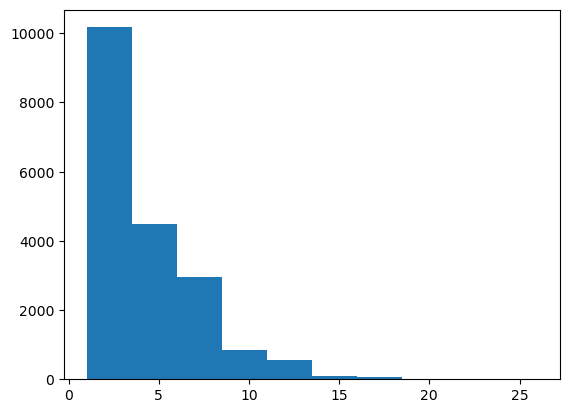

In [298]:
plt.hist(medrec_group.size())

In [299]:
medrec_group.count()

,MedicalRecordID,ScheduleID,ConsultTime,ConsultNote,ProgressNote,Summary,RequestI,RequestII,TreatmentCat,Disclosure,...,TaxableAmt,TDiscountAmt,PregGrantAmt,CancerNo,MedicalRecordID_ORG,ExceptClaim,InfantFlag,Ins100Amt,LtClaimAmt,LtChargeAmt
PatientID,,,,,,,,,,,,,,,,,,,,,
8,1,1,1,0,1,0,1,0,1,1,...,1,1,1,1,0,1,1,1,1,1
27,4,4,4,0,3,0,3,0,4,4,...,4,4,4,4,0,4,4,4,4,4
37,6,6,6,0,5,0,4,0,6,6,...,6,6,6,6,0,6,6,6,6,6
44,6,6,6,0,5,0,5,0,6,6,...,6,6,6,6,0,6,6,6,6,6
46,6,6,6,0,5,0,4,0,6,6,...,6,6,6,6,0,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312730,1,1,1,0,1,0,1,0,1,1,...,1,1,1,1,0,1,1,1,1,1
312736,1,1,1,0,1,0,1,0,1,1,...,1,1,1,1,0,1,1,1,1,1
312755,1,1,1,0,1,0,1,0,1,1,...,1,1,1,1,0,1,1,1,1,1


In [300]:
gangnam.dataDict.keys()

dict_keys(['gangnam_tinbodyadditionaldata.csv', 'gangnam_TInBodyBalanceEvaluation.csv', 'gangnam_tinbodychildgrowth.csv', 'gangnam_tinbodycomponent.csv', 'gangnam_tinbodycomponentpercentile.csv', 'gangnam_tinbodyedema.csv', 'gangnam_tinbodyevaluation.csv', 'gangnam_tinbodyimpedence.csv', 'gangnam_tinbodyleanbalance.csv', 'gangnam_tinbodymeasurement.csv', 'gangnam_tinbodyobesitydiagnosis.csv', 'gangnam_tinbodyreadingSummary.csv', 'gangnam_TInBodySkeletalBodyFat.csv', 'gangnam_TInBodySkelMuscle.csv', 'gangnam_tmedicalrecord.csv', 'gangnam_tmedication.csv', 'gangnam_tpatientmemo.csv', 'gangnam_tpatientpersonal.csv', 'gangnam_tpatientvitaltemp.csv'])

In [301]:
inbody_file_names = gangnam.fileList[0:14]

In [302]:
inbody_file_names.remove('gangnam_tinbodyimpedence.csv')

In [303]:
inbody_file_names.remove('gangnam_tinbodymeasurement.csv')

In [304]:
inbody_file_names.remove('gangnam_tinbodyobesitydiagnosis.csv')

In [305]:
for i, name in enumerate(inbody_file_names):
    df = gangnam.dataDict[name]
    df['MeasureDate'] = pd.to_datetime(df['MeasureDate'], format='%Y%m%d%H%M%S')
    df = df.sort_values(by=['PatientID', 'MeasureDate']).reset_index(drop=True)
    print()
    print(i, name, len(df))
    if i == 0 :
        inbody_total_df = df
        print(inbody_total_df.head())

    else:
        df.drop(columns=['ReadingID'], inplace=True)
        df_columns = set(df.columns)
        total_columns = set(inbody_total_df.columns)
        common_feature = list(df_columns & total_columns)
        print(common_feature)
        inbody_total_df =pd.merge(inbody_total_df, df, on = common_feature)
        print(len(inbody_total_df))



0 gangnam_tinbodyadditionaldata.csv 9290
   ReadingID  PatientID         MeasureDate  ObesityDegree   BCM   BMR   BMC  \
0     472946          0 2023-02-07 14:59:02            110  27.4  1285  2.53   
1     472951          0 2023-02-07 15:01:44            110  27.5  1291  2.54   
2     480936          0 2023-05-11 16:15:18             91  24.7  1180  2.22   
3     482766          0 2023-05-31 13:43:01            113  25.5  1220  2.36   
4     482881          0 2023-06-01 14:37:07             99  25.9  1241  2.40   

   ReadingID_ORG  
0             56  
1             56  
2             56  
3             56  
4             56  

1 gangnam_TInBodyBalanceEvaluation.csv 9290
['MeasureDate', 'PatientID', 'ReadingID_ORG']
9290

2 gangnam_tinbodychildgrowth.csv 9290
['MonthAge', 'PHeight', 'PWeight', 'MeasureDate', 'PatientID', 'Weight', 'Height', 'ReadingID_ORG']
9290

3 gangnam_tinbodycomponent.csv 9290
['MeasureDate', 'PatientID', 'ReadingID_ORG']
9290

4 gangnam_tinbodycomponentpercenti

In [192]:
inbody_total_df.shape

(9290, 83)

In [194]:
group_inbody_df.size()

PatientID
0         37
8          1
271        1
447        2
451        2
          ..
312870     1
312871     1
312891     1
312920     1
312921     1
Length: 5704, dtype: int64

In [195]:
inbody_total_df.tail(100) #Circum, CircumDF, Muscle mesurment 데이터를 따로 처리해야함을 느낌

,ReadingID,PatientID,MeasureDate,ObesityDegree,BCM,BMR,BMC,ReadingID_ORG,Weight,Height,...,IRightLeg,ILeftLeg,TargetWeight,WeightControl,FatControl,MuscleControl,FitnessScore,SkeletalBodyMass,IdealSMM,PSMM
9190,514861,311511,2024-05-04 14:17:17,101,21.0,1073,1.91,56,48.8,152.0,...,89.4,89.6,48.5,-0.3,-5.1,4.8,70,30.7,20.2,85.2
9191,514376,311541,2024-04-29 13:33:14,157,36.0,1568,3.21,56,91.9,167.0,...,121.3,115.3,72.0,-19.9,-19.9,0.0,71,52.3,24.8,123.8
9192,514341,311560,2024-04-29 12:15:39,98,24.4,1203,2.50,56,58.3,168.7,...,95.5,95.8,59.8,1.5,-6.0,7.5,67,36.1,25.4,79.5
9193,514436,311571,2024-04-29 17:32:04,142,30.3,1379,2.62,56,76.7,160.5,...,109.4,108.1,60.7,-16.0,-16.0,0.0,69,44.1,22.8,112.7
9194,514616,311580,2024-05-02 12:40:31,97,25.3,1215,2.27,56,49.7,156.0,...,103.7,106.6,51.2,1.5,1.2,0.3,79,36.8,21.4,98.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9285,515716,312870,2024-05-16 18:49:58,122,36.9,1594,3.11,56,81.8,174.5,...,96.8,96.9,67.0,-14.8,-15.1,0.3,65,53.5,31.8,99.4
9286,515711,312871,2024-05-16 18:46:05,134,28.7,1332,2.66,56,73.5,161.6,...,97.8,99.2,57.8,-15.7,-15.7,0.0,67,41.8,23.1,104.3
9287,515701,312891,2024-05-16 18:22:46,109,21.4,1088,2.07,56,54.6,154.7,...,87.8,87.8,50.3,-4.3,-9.8,5.5,65,31.1,21.0,82.9
9288,515726,312920,2024-05-16 19:04:02,124,27.6,1292,2.53,56,66.5,160.1,...,101.6,100.4,55.4,-11.1,-11.1,0.0,70,40.2,22.6,102.7


In [338]:
df = gangnam.dataDict['gangnam_tinbodymeasurement.csv']
df['MeasureDate'] = pd.to_datetime(df['MeasureDate'], format='%Y%m%d%H%M%S')
df = df.sort_values(by=['PatientID', 'MeasureDate']).reset_index(drop=True)

In [339]:
df

,ReadingID,PatientID,MeasureDate,BodyPart,Circum,CircumST,CircumDF,Muscle,MuscleST,MuscleDF,Fat,FatST,FatDF,ReadingID_ORG
0,3266651,0,2023-02-07 14:59:02,0,31.1,31.6,0.5,0.0,0.0,0.0,0.0,0.0,0,56
1,3266656,0,2023-02-07 14:59:02,1,85.4,84.1,-1.3,79.9,79.7,-0.2,0.9,0.7,0,56
2,3266661,0,2023-02-07 14:59:02,2,76.1,73.0,-3.1,69.8,68.0,-1.8,1.0,0.8,0,56
3,3266666,0,2023-02-07 14:59:02,3,95.0,89.2,-5.8,0.0,0.0,0.0,0.0,0.0,0,56
4,3266671,0,2023-02-07 14:59:02,4,28.0,26.6,-1.4,24.0,23.3,-0.7,0.6,0.5,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74315,3592346,312921,2024-05-16 18:22:58,3,91.9,89.2,-2.7,0.0,0.0,0.0,0.0,0.0,0,56
74316,3592351,312921,2024-05-16 18:22:58,4,28.4,26.6,-1.8,24.3,23.3,-1.0,0.7,0.5,0,56
74317,3592356,312921,2024-05-16 18:22:58,5,28.0,26.6,-1.4,23.7,23.3,-0.4,0.7,0.5,0,56
74318,3592361,312921,2024-05-16 18:22:58,6,49.7,48.6,-1.1,42.2,42.5,0.3,1.2,1.0,0,56


In [318]:
pd.reset_option('all')
df = df.iloc[:,1:12]

C:\Users\howsr\AppData\Local\Temp\ipykernel_34200\953548121.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [319]:
74320 /8

9290.0

In [320]:
feature_names = df.columns[3:]
neck_feature_names = ['neck_'+ name for name in feature_names]
chest_feature_names = ['chest_'+ name for name in feature_names]
abdomen_feature_names = ['abdomen_'+ name for name in feature_names]
hip_feature_names = ['hip_'+ name for name in feature_names]
Larm_feature_names = ['Larm_'+ name for name in feature_names]
Rarm_feature_names = ['Rarm_'+ name for name in feature_names]
Lleg_feature_names = ['Lleg_'+ name for name in feature_names]
Rleg_feature_names = ['Rleg_'+ name for name in feature_names]


In [328]:
imsi_list=list(df.loc[i][3:])
imsi_list

[49.2, 48.6, -0.6, 41.8, 42.5, 0.7, 1.2, 1.0]

In [329]:
neck_feature_names

['neck_Circum',
 'neck_CircumST',
 'neck_CircumDF',
 'neck_Muscle',
 'neck_MuscleST',
 'neck_MuscleDF',
 'neck_Fat',
 'neck_FatST']

In [321]:
{neck_feature_names[i]:imsi_list[i] for i in range(8)}

{'neck_Circum': 85.4,
 'neck_CircumST': 84.1,
 'neck_CircumDF': -1.3,
 'neck_Muscle': 79.9,
 'neck_MuscleST': 79.7,
 'neck_MuscleDF': -0.2,
 'neck_Fat': 0.9,
 'neck_FatST': 0.7}

In [337]:
df

,PatientID,MeasureDate,BodyPart,Circum,CircumST,CircumDF,Muscle,MuscleST,MuscleDF,Fat,FatST
0,0,2023-02-07 14:59:02,0,31.1,31.6,0.5,0.0,0.0,0.0,0.0,0.0
1,0,2023-02-07 14:59:02,1,85.4,84.1,-1.3,79.9,79.7,-0.2,0.9,0.7
2,0,2023-02-07 14:59:02,2,76.1,73.0,-3.1,69.8,68.0,-1.8,1.0,0.8
3,0,2023-02-07 14:59:02,3,95.0,89.2,-5.8,0.0,0.0,0.0,0.0,0.0
4,0,2023-02-07 14:59:02,4,28.0,26.6,-1.4,24.0,23.3,-0.7,0.6,0.5
...,...,...,...,...,...,...,...,...,...,...,...
74315,312921,2024-05-16 18:22:58,3,91.9,89.2,-2.7,0.0,0.0,0.0,0.0,0.0
74316,312921,2024-05-16 18:22:58,4,28.4,26.6,-1.8,24.3,23.3,-1.0,0.7,0.5
74317,312921,2024-05-16 18:22:58,5,28.0,26.6,-1.4,23.7,23.3,-0.4,0.7,0.5
74318,312921,2024-05-16 18:22:58,6,49.7,48.6,-1.1,42.2,42.5,0.3,1.2,1.0


In [333]:
feature_names = df.columns[2:]
for j in range(10):
    if j % 8 == 0:
        imsi_dict = {'PatientID': df.loc[0,'PatientID'], 'MeasureDate' : df.loc[0,'MeasureDate']}
        imsi_list=list(df.loc[j][3:])
        imsi_dict2 = {neck_feature_names[i]:[imsi_list[i]] for i in range(8)}
        print(imsi_list,'\n')
        print(imsi_dict2,'\n')
        imsi_dict.update(imsi_dict2)
    elif j % 8 == 1:
        imsi_list=list(df.loc[j][3:])
        imsi_dict2 = {chest_feature_names[i]:[imsi_list[i]] for i in range(8)}
        imsi_dict.update(imsi_dict2)
    elif j % 8 == 2:
        imsi_list=list(df.loc[j][3:])
        imsi_dict2 = {abdomen_feature_names[i]:[imsi_list[i]] for i in range(8)}
        imsi_dict.update(imsi_dict2)
    elif j % 8 == 3:
        imsi_list=list(df.loc[j][3:])
        imsi_dict2 = {hip_feature_names[i]:[imsi_list[i]] for i in range(8)}
        imsi_dict.update(imsi_dict2)
    elif j % 8 == 4:
        imsi_list=list(df.loc[j][3:])
        imsi_dict2 = {Larm_feature_names[i]:[imsi_list[i]] for i in range(8)}
        imsi_dict.update(imsi_dict2)
    elif j % 8 == 5:
        imsi_list=list(df.loc[j][3:])
        imsi_dict2 = {Rarm_feature_names[i]:[imsi_list[i]] for i in range(8)}
        imsi_dict.update(imsi_dict2)
    elif j % 8 == 6:
        imsi_list=list(df.loc[j][3:])
        imsi_dict2 = {Lleg_feature_names[i]:[imsi_list[i]] for i in range(8)}
        imsi_dict.update(imsi_dict2)
    elif j % 8 == 7:
        imsi_list=list(df.loc[j][3:])
        imsi_dict2 = {Rleg_feature_names[i]:[imsi_list[i]] for i in range(8)}
        imsi_dict.update(imsi_dict2)
        
    if j < 7:
        continue
    elif j == 7:
        mesurment_df = pd.DataFrame(imsi_dict)
    elif j % 8 == 7:
        imsi_df = pd.DataFrame(imsi_dict)
        mesurment_df = pd.concat([mesurment_df, imsi_df])
#print(mesurment_df)
        


[31.1, 31.6, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0] 

{'neck_Circum': [31.1], 'neck_CircumST': [31.6], 'neck_CircumDF': [0.5], 'neck_Muscle': [0.0], 'neck_MuscleST': [0.0], 'neck_MuscleDF': [0.0], 'neck_Fat': [0.0], 'neck_FatST': [0.0]} 

[31.1, 31.6, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0] 

{'neck_Circum': [31.1], 'neck_CircumST': [31.6], 'neck_CircumDF': [0.5], 'neck_Muscle': [0.0], 'neck_MuscleST': [0.0], 'neck_MuscleDF': [0.0], 'neck_Fat': [0.0], 'neck_FatST': [0.0]} 



In [332]:
feature_names = df.columns[2:]
for j in range(len(df)):
    if j % 8 == 0:
        imsi_dict = {'PatientID': df.loc[0,'PatientID'], 'MeasureDate' : df.loc[0,'MeasureDate']}
        imsi_list=list(df.loc[j][3:])
        imsi_dict2 = {neck_feature_names[i]:[imsi_list[i]] for i in range(8)}
        print(imsi_dict2,'\n')
        imsi_dict.update(imsi_dict2)
    elif j % 8 == 1:
        imsi_list=list(df.loc[j][3:])
        imsi_dict2 = {chest_feature_names[i]:[imsi_list[i]] for i in range(8)}
        imsi_dict.update(imsi_dict2)
    elif j % 8 == 2:
        imsi_list=list(df.loc[j][3:])
        imsi_dict2 = {abdomen_feature_names[i]:[imsi_list[i]] for i in range(8)}
        imsi_dict.update(imsi_dict2)
    elif j % 8 == 3:
        imsi_list=list(df.loc[j][3:])
        imsi_dict2 = {hip_feature_names[i]:[imsi_list[i]] for i in range(8)}
        imsi_dict.update(imsi_dict2)
    elif j % 8 == 4:
        imsi_list=list(df.loc[j][3:])
        imsi_dict2 = {Larm_feature_names[i]:[imsi_list[i]] for i in range(8)}
        imsi_dict.update(imsi_dict2)
    elif j % 8 == 5:
        imsi_list=list(df.loc[j][3:])
        imsi_dict2 = {Rarm_feature_names[i]:[imsi_list[i]] for i in range(8)}
        imsi_dict.update(imsi_dict2)
    elif j % 8 == 6:
        imsi_list=list(df.loc[j][3:])
        imsi_dict2 = {Lleg_feature_names[i]:[imsi_list[i]] for i in range(8)}
        imsi_dict.update(imsi_dict2)
    elif j % 8 == 7:
        imsi_list=list(df.loc[j][3:])
        imsi_dict2 = {Rleg_feature_names[i]:[imsi_list[i]] for i in range(8)}
        imsi_dict.update(imsi_dict2)
        
    if j < 7:
        continue
    elif j == 7:
        mesurment_df = pd.DataFrame(imsi_dict)
    elif j % 8 == 7:
        imsi_df = pd.DataFrame(imsi_dict)
        mesurment_df = pd.concat([mesurment_df, imsi_df])
#print(mesurment_df)
        

        
        

{'neck_Circum': [31.1], 'neck_CircumST': [31.6], 'neck_CircumDF': [0.5], 'neck_Muscle': [0.0], 'neck_MuscleST': [0.0], 'neck_MuscleDF': [0.0], 'neck_Fat': [0.0], 'neck_FatST': [0.0]} 

{'neck_Circum': [31.1], 'neck_CircumST': [31.6], 'neck_CircumDF': [0.5], 'neck_Muscle': [0.0], 'neck_MuscleST': [0.0], 'neck_MuscleDF': [0.0], 'neck_Fat': [0.0], 'neck_FatST': [0.0]} 

{'neck_Circum': [31.6], 'neck_CircumST': [31.6], 'neck_CircumDF': [0.0], 'neck_Muscle': [0.0], 'neck_MuscleST': [0.0], 'neck_MuscleDF': [0.0], 'neck_Fat': [0.0], 'neck_FatST': [0.0]} 

{'neck_Circum': [30.9], 'neck_CircumST': [31.6], 'neck_CircumDF': [0.7], 'neck_Muscle': [0.0], 'neck_MuscleST': [0.0], 'neck_MuscleDF': [0.0], 'neck_Fat': [0.0], 'neck_FatST': [0.0]} 

{'neck_Circum': [31.2], 'neck_CircumST': [31.6], 'neck_CircumDF': [0.4], 'neck_Muscle': [0.0], 'neck_MuscleST': [0.0], 'neck_MuscleDF': [0.0], 'neck_Fat': [0.0], 'neck_FatST': [0.0]} 

{'neck_Circum': [33.5], 'neck_CircumST': [31.6], 'neck_CircumDF': [-1.9], '

In [323]:
mesurment_df.reset_index(inplace=True, drop=True)

In [324]:
mesurment_df

,PatientID,MeasureDate,neck_Circum,neck_CircumST,neck_CircumDF,neck_Muscle,neck_MuscleST,neck_MuscleDF,neck_Fat,neck_FatST,...,Lleg_Fat,Lleg_FatST,Rleg_Circum,Rleg_CircumST,Rleg_CircumDF,Rleg_Muscle,Rleg_MuscleST,Rleg_MuscleDF,Rleg_Fat,Rleg_FatST
0,0,2023-02-07 14:59:02,31.1,31.6,0.5,0.0,0.0,0.0,0.0,0.0,...,1.2,1.0,52.8,48.6,-4.2,45.4,42.5,-2.9,1.2,1.0
1,0,2023-02-07 14:59:02,31.1,31.6,0.5,0.0,0.0,0.0,0.0,0.0,...,1.2,1.0,52.6,48.6,-4.0,45.3,42.5,-2.8,1.2,1.0
2,0,2023-02-07 14:59:02,31.6,31.6,0.0,0.0,0.0,0.0,0.0,0.0,...,1.1,1.0,47.5,48.6,1.1,40.7,42.5,1.8,1.1,1.0
3,0,2023-02-07 14:59:02,30.9,31.6,0.7,0.0,0.0,0.0,0.0,0.0,...,1.2,1.0,52.1,48.6,-3.5,44.6,42.5,-2.1,1.2,1.0
4,0,2023-02-07 14:59:02,31.2,31.6,0.4,0.0,0.0,0.0,0.0,0.0,...,1.1,1.0,49.7,48.6,-1.1,43.1,42.5,-0.6,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9285,0,2023-02-07 14:59:02,40.3,36.5,-3.8,0.0,0.0,0.0,0.0,0.0,...,1.0,0.6,53.5,51.1,-2.4,47.6,47.4,-0.2,0.9,0.6
9286,0,2023-02-07 14:59:02,36.1,31.6,-4.5,0.0,0.0,0.0,0.0,0.0,...,1.5,1.0,54.4,48.6,-5.8,45.3,42.5,-2.8,1.4,1.0
9287,0,2023-02-07 14:59:02,30.7,31.6,0.9,0.0,0.0,0.0,0.0,0.0,...,1.4,1.0,50.1,48.6,-1.5,41.6,42.5,0.9,1.3,1.0
9288,0,2023-02-07 14:59:02,33.6,31.6,-2.0,0.0,0.0,0.0,0.0,0.0,...,1.4,1.0,54.3,48.6,-5.7,45.8,42.5,-3.3,1.4,1.0


In [220]:
inbody_total_df =pd.concat([inbody_total_df,mesurment_df.iloc[:,2:]], axis =1)


In [313]:
df = gangnam.dataDict['gangnam_tinbodyimpedence.csv']
df['MeasureDate'] = pd.to_datetime(df['MeasureDate'], format='%Y%m%d%H%M%S')
df = df.sort_values(by=['PatientID', 'MeasureDate']).reset_index(drop=True)
df

,ReadingID,PatientID,MeasureDate,Freq,RA,LA,TR,RL,LL,ReadingID_ORG
0,2175191,0,2023-02-07 14:59:02,1,415.6,398.6,28.3,249.7,249.6,56
1,2175196,0,2023-02-07 14:59:02,5,408.6,392.2,27.4,245.1,245.1,56
2,2175201,0,2023-02-07 14:59:02,50,376.0,361.7,24.4,221.2,221.0,56
3,2175206,0,2023-02-07 14:59:02,250,343.9,332.1,21.5,199.5,198.8,56
4,2175211,0,2023-02-07 14:59:02,500,331.7,320.6,20.3,194.9,193.6,56
...,...,...,...,...,...,...,...,...,...,...
55735,2420061,312921,2024-05-16 18:22:58,5,461.2,464.2,31.1,319.5,311.4,56
55736,2420066,312921,2024-05-16 18:22:58,50,415.9,423.1,27.4,283.5,278.9,56
55737,2420071,312921,2024-05-16 18:22:58,250,379.0,388.8,24.1,258.8,255.1,56
55738,2420076,312921,2024-05-16 18:22:58,500,367.2,377.2,22.8,253.1,250.2,56


In [314]:
#freq 기준으로 만듬
feature_names = df.columns[4:9]
feature_names1 = ['1_'+ name for name in feature_names]
feature_names5 = ['5_'+ name for name in feature_names]
feature_names50 = ['50_'+ name for name in feature_names]
feature_names250 = ['250_'+ name for name in feature_names]
feature_names500 = ['500_'+ name for name in feature_names]
feature_names1000 = ['1000_'+ name for name in feature_names]

In [316]:
df.loc[i][4:9]

RA    329.9
LA    316.7
TR     20.2
RL    194.8
LL    193.7
Name: 10, dtype: object

In [174]:
for i in range(len(df)):
    if i % 6 == 0:
        imsi_dict = {'PatientID': df.loc[0,'PatientID'], 'MeasureDate' : df.loc[0,'MeasureDate']}
        imsi_list=list(df.loc[i][4:9])
        imsi_dict2 = {feature_names1[i]:[imsi_list[i]] for i in range(5)}
        imsi_dict.update(imsi_dict2)
    elif i % 6 == 1:
        imsi_list=list(df.loc[i][4:9])
        imsi_dict2 = {feature_names5[i]:[imsi_list[i]] for i in range(5)}
        imsi_dict.update(imsi_dict2)
    elif i % 6 == 2:
        imsi_list=list(df.loc[i][4:9])
        imsi_dict2 = {feature_names50[i]:[imsi_list[i]] for i in range(5)}
        imsi_dict.update(imsi_dict2)
    elif i % 6 == 3:
        imsi_list=list(df.loc[i][4:9])
        imsi_dict2 = {feature_names250[i]:[imsi_list[i]] for i in range(5)}
        imsi_dict.update(imsi_dict2)
    elif i % 6 == 4:
        imsi_list=list(df.loc[i][4:9])
        imsi_dict2 = {feature_names500[i]:[imsi_list[i]] for i in range(5)}
        imsi_dict.update(imsi_dict2)
    elif i % 6 == 5:
        imsi_list=list(df.loc[i][4:9])
        imsi_dict2 = {feature_names1000[i]:[imsi_list[i]] for i in range(5)}
        imsi_dict.update(imsi_dict2)
        
    if i < 5:
        continue
    elif i == 5:
        impedence_df = pd.DataFrame(imsi_dict)
    elif i % 6 == 5:
        imsi_df = pd.DataFrame(imsi_dict)
        impedence_df = pd.concat([impedence_df, imsi_df])
#print(impedence_df)
        

    PatientID         MeasureDate  1_RA   1_LA   1_TR  1_RL   1_LL  5_RA  \
0           0 2023-02-07 14:59:02     1  415.6  398.6  28.3  249.7     5   
0           0 2023-02-07 14:59:02     1  413.1  391.5  28.3  249.9     5   
0           0 2023-02-07 14:59:02     1  558.0  575.9  37.7  400.0     5   
0           0 2023-02-07 14:59:02     1  432.7  428.8  25.9  263.3     5   
0           0 2023-02-07 14:59:02     1  453.6  462.4  32.7  286.3     5   
..        ...                 ...   ...    ...    ...   ...    ...   ...   
0           0 2023-02-07 14:59:02     1  331.5  341.8  31.2  266.5     5   
0           0 2023-02-07 14:59:02     1  385.3  382.3  24.1  269.7     5   
0           0 2023-02-07 14:59:02     1  517.7  517.4  31.2  306.7     5   
0           0 2023-02-07 14:59:02     1  415.3  399.8  28.4  262.5     5   
0           0 2023-02-07 14:59:02     1  471.4  473.4  32.2  327.2     5   

     5_LA   5_TR  ...  500_RA  500_LA  500_TR  500_RL  500_LL  1000_RA  \
0   408.6  39

In [210]:
inbody_total_df

,ReadingID,PatientID,MeasureDate,ObesityDegree,BCM,BMR,BMC,ReadingID_ORG,Weight,Height,...,Lleg_MuscleDF,Lleg_Fat,Rleg_BodyPart,Rleg_Circum,Rleg_CircumST,Rleg_CircumDF,Rleg_Muscle,Rleg_MuscleST,Rleg_MuscleDF,Rleg_Fat
0,472946,0,2023-02-07 14:59:02,110,27.4,1285,2.53,56,60.4,161.4,...,-2.9,1.2,7,52.8,48.6,-4.2,45.4,42.5,-2.9,1.2
1,472951,0,2023-02-07 15:01:44,110,27.5,1291,2.54,56,60.4,161.4,...,-2.9,1.2,7,52.6,48.6,-4.0,45.3,42.5,-2.8,1.2
2,480936,0,2023-05-11 16:15:18,91,24.7,1180,2.22,56,52.2,165.3,...,1.5,1.1,7,47.5,48.6,1.1,40.7,42.5,1.8,1.1
3,482766,0,2023-05-31 13:43:01,113,25.5,1220,2.36,56,57.1,154.8,...,-2.2,1.2,7,52.1,48.6,-3.5,44.6,42.5,-2.1,1.2
4,482881,0,2023-06-01 14:37:07,99,25.9,1241,2.40,56,57.7,166.5,...,-0.8,1.1,7,49.7,48.6,-1.1,43.1,42.5,-0.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9285,515716,312870,2024-05-16 18:49:58,122,36.9,1594,3.11,56,81.8,174.5,...,-0.7,1.0,7,53.5,51.1,-2.4,47.6,47.4,-0.2,0.9
9286,515711,312871,2024-05-16 18:46:05,134,28.7,1332,2.66,56,73.5,161.6,...,-3.8,1.5,7,54.4,48.6,-5.8,45.3,42.5,-2.8,1.4
9287,515701,312891,2024-05-16 18:22:46,109,21.4,1088,2.07,56,54.6,154.7,...,0.5,1.4,7,50.1,48.6,-1.5,41.6,42.5,0.9,1.3
9288,515726,312920,2024-05-16 19:04:02,124,27.6,1292,2.53,56,66.5,160.1,...,-3.3,1.4,7,54.3,48.6,-5.7,45.8,42.5,-3.3,1.4


In [211]:
impedence_df.reset_index(inplace=True, drop=True)

In [221]:
inbody_total_df = pd.concat([inbody_total_df, impedence_df.iloc[:,2:]], axis = 1)

In [222]:
inbody_total_df

,ReadingID,PatientID,MeasureDate,ObesityDegree,BCM,BMR,BMC,ReadingID_ORG,Weight,Height,...,500_RA,500_LA,500_TR,500_RL,500_LL,1000_RA,1000_LA,1000_TR,1000_RL,1000_LL
0,472946,0,2023-02-07 14:59:02,110,27.4,1285,2.53,56,60.4,161.4,...,500,331.7,320.6,20.3,194.9,1000,322.4,312.1,18.8,193.6
1,472951,0,2023-02-07 15:01:44,110,27.5,1291,2.54,56,60.4,161.4,...,500,329.9,316.7,20.2,194.8,1000,320.8,308.8,18.7,193.5
2,480936,0,2023-05-11 16:15:18,91,24.7,1180,2.22,56,52.2,165.3,...,500,415.1,438.3,25.5,292.1,1000,407.7,431.3,23.6,288.8
3,482766,0,2023-05-31 13:43:01,113,25.5,1220,2.36,56,57.1,154.8,...,500,333.4,331.2,17.8,202.4,1000,325.5,322.9,16.5,201.8
4,482881,0,2023-06-01 14:37:07,99,25.9,1241,2.40,56,57.7,166.5,...,500,363.2,377.2,23.3,228.7,1000,356.6,370.6,21.2,224.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9285,515716,312870,2024-05-16 18:49:58,122,36.9,1594,3.11,56,81.8,174.5,...,500,244.4,254.2,20.3,203.2,1000,239.6,248.7,19.6,199.2
9286,515711,312871,2024-05-16 18:46:05,134,28.7,1332,2.66,56,73.5,161.6,...,500,304.0,304.0,19.2,207.7,1000,297.7,297.9,18.4,206.4
9287,515701,312891,2024-05-16 18:22:46,109,21.4,1088,2.07,56,54.6,154.7,...,500,411.8,411.1,22.3,246.7,1000,402.1,401.9,20.7,242.5
9288,515726,312920,2024-05-16 19:04:02,124,27.6,1292,2.53,56,66.5,160.1,...,500,327.8,314.2,19.8,204.1,1000,319.7,307.3,18.3,203.0


In [223]:
col_list = inbody_total_df.columns

In [224]:
inbody_total_df

177,177


In [225]:
df = gangnam.dataDict['gangnam_tinbodyobesitydiagnosis.csv']
df['MeasureDate'] = pd.to_datetime(df['MeasureDate'], format='%Y%m%d%H%M%S')
df = df.sort_values(by=['PatientID', 'MeasureDate']).reset_index(drop=True)
df

,ReadingID,PatientID,MeasureDate,PWeight,PSMM,PBMF,PBF,PWHR,PVFA,BMI,Weight,SMM,BodyFat,VFA,WHR,ReadingID_ORG
0,462731,0,2023-02-07 14:59:02,110.4,99.6,166.2,29.8,0.80,69.0,23.2,60.4,22.9,18.0,69.0,0.80,56
1,462736,0,2023-02-07 15:01:44,110.4,100.4,163.3,29.4,0.80,68.5,23.2,60.4,23.1,17.8,68.5,0.80,56
2,470736,0,2023-05-11 16:15:18,91.0,84.4,117.1,28.1,0.85,55.0,19.1,52.2,20.5,14.7,55.0,0.85,56
3,472566,0,2023-05-31 13:43:01,113.5,101.0,181.5,31.1,0.79,69.3,23.8,57.1,21.2,17.7,69.3,0.79,56
4,472681,0,2023-06-01 14:37:07,99.1,87.8,145.5,30.1,0.83,72.3,20.8,57.7,21.6,17.4,72.3,0.83,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9285,505626,312870,2024-05-16 18:49:58,122.1,99.4,250.2,30.7,0.97,113.6,26.9,81.8,31.6,25.2,113.6,0.97,56
9286,505621,312871,2024-05-16 18:46:05,134.0,104.3,298.8,39.4,0.92,147.5,28.1,73.5,24.1,29.0,147.5,0.92,56
9287,505611,312891,2024-05-16 18:22:46,108.6,82.9,230.0,39.1,0.83,113.1,22.8,54.6,17.4,21.4,113.1,0.83,56
9288,505641,312920,2024-05-16 19:04:02,123.5,102.7,241.7,35.8,0.86,110.9,25.9,66.5,23.2,23.8,110.9,0.86,56


In [226]:
df.drop(columns=['ReadingID'], inplace=True)
df_columns = set(df.columns)
total_columns = set(inbody_total_df.columns)
common_feature = list(df_columns & total_columns)
print(common_feature)

['PSMM', 'PWeight', 'MeasureDate', 'PatientID', 'Weight', 'ReadingID_ORG']


In [245]:
for feature in common_feature:
    print(False in (df[feature] == inbody_total_df[feature]))


False
False
False
False
False
False


In [260]:
df = df.drop('PSMM', axis=1)
df = df.drop('PWeight', axis=1)
df = df.drop('Weight', axis=1)
df = df.drop('ReadingID_ORG', axis=1)

In [261]:
imsi_df = pd.merge(inbody_total_df, df, on = ['MeasureDate', 'PatientID'])

In [262]:
imsi_df.shape

(9290, 186)

In [263]:
imsi_df.sort_values(by=['PatientID', 'MeasureDate']).reset_index(drop=True).head()

,ReadingID,PatientID,MeasureDate,ObesityDegree,BCM,BMR,BMC,ReadingID_ORG,Weight,Height,...,1000_LL,PBMF,PBF,PWHR,PVFA,BMI,SMM,BodyFat,VFA,WHR
0,472946,0,2023-02-07 14:59:02,110,27.4,1285,2.53,56,60.4,161.4,...,193.6,166.2,29.8,0.80,69.0,23.2,22.9,18.0,69.0,0.80
1,472951,0,2023-02-07 15:01:44,110,27.5,1291,2.54,56,60.4,161.4,...,193.5,163.3,29.4,0.80,68.5,23.2,23.1,17.8,68.5,0.80
2,480936,0,2023-05-11 16:15:18,91,24.7,1180,2.22,56,52.2,165.3,...,288.8,117.1,28.1,0.85,55.0,19.1,20.5,14.7,55.0,0.85
3,482766,0,2023-05-31 13:43:01,113,25.5,1220,2.36,56,57.1,154.8,...,201.8,181.5,31.1,0.79,69.3,23.8,21.2,17.7,69.3,0.79
4,482881,0,2023-06-01 14:37:07,99,25.9,1241,2.40,56,57.7,166.5,...,224.6,145.5,30.1,0.83,72.3,20.8,21.6,17.4,72.3,0.83


In [265]:
inbody_total_df = imsi_df

In [266]:
inbody_total_df.to_csv('inbody_total_df.csv', index=False)
inbody_total_df.to_excel('inbody_total_df.xlsx', index=False)